# ASTR 596: The Final

#### Three questions, each worth a third of your grade. (I'll make one 34 pts to get to an even 100). Each is designed to test an area where I think the class as a whole is less comfortable. They are sorted by my assesment of difficulty from easiest to hardest. 
#### i.e. the last is probably going to be non-trivial, because well I like Gaussian distributions of grades. 
#### That's OK because the points and grades don't matter!

#### Remember, you can work together, discuss problems and solutions, but you have to write up your own solution. I'd strongly suggest doing that, ideally with some divide and conquer strategy.

### Q1. Using unsupervised learning to work with galaxies

The following query will select 20k likely galaxies from the SDSS database and return the results of that query into an `astropy Table`.  (For now, if you are not familiar with the SDSS DB schema, don't worry about this query, just know that it returns a bunch of photometric features.)

In [1]:
#%matplotlib notebook
#%pylab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 20000 
         p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
         p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
         p.petroRad_i, p.petroR50_i, p.deVAB_i, p.fracDev_i
         FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
         WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
         AND p.deVAB_i > -999 AND p.petroRad_i > -999 AND p.petroR50_i > -999 AND p.dered_r < 20
           """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

<Table length=20000>
   ug        gr       gi       gz    petroRad_i petroR50_i  deVAB_i  fracDev_i
float64   float64  float64  float64   float64    float64    float64   float64 
-------- --------- -------- -------- ---------- ---------- --------- ---------
1.999718 0.9592915 1.370582 1.692535   5.454633   2.344662 0.8708095       1.0
1.995602 0.8648911  1.37731 1.804652   11.33485   4.198316 0.1971019 0.1768574
 1.80427 0.8019819 1.181864 1.494041   13.24963   5.983386 0.6463994       1.0
1.960358   1.01811  1.43551 1.812202   5.584978    2.37426 0.9983933       1.0
2.069033 0.8691826     1.27 1.594503    4.41361    1.94748 0.6640796 0.4441161
 2.10231 0.9554272 1.398304 1.751862   8.101495   2.779783 0.7623315       1.0
     ...       ...      ...      ...        ...        ...       ...       ...
 1.94001   1.29369 1.755207 2.121235   5.503857   2.135612  0.970674       1.0
1.366793 0.8987312 1.337736 1.642424   3.766591   1.734398 0.8873758 0.8941734
4.141239  1.523756  2.06786 2.417015   6.020975   2.629329 0.6583148       1.0
2.942856  1.799767 2.602898 2.947372   4.584948   1.751321 0.9646437       1.0
1.380613  1.804207 2.630535 3.074697   7.391466   1.866481 0.8332803       1.0
1.833529  1.091501 1.533476 1.874229   4.062571   1.737356 0.7333825       1.0
1.992926  1.156199 1.618359 1.977682   4.723069   1.808603 0.5173329       1.0

### 1a - Visualize the dataset in g-i (y) vs u-g (x) and all the features (11 pts). 

The bluest galaxies are star-forming galaxies at low redshift 𝑧. The "tight" cluster of red galaxies are passive galaxies at low-𝑧. Finally the diffuse cloud at 𝑔−𝑖≈3 are high-𝑧 luminous red galaxies (LRGs) that were targeted for BAO measurements. These sources have a wide range of 𝑢−𝑔 colors because they essentially are not detected in the 𝑢 band as this is blueward of the Lyman break.

Plot and examine each of the features in this data set using seaborn's `PairGrid`. Overlay a histogram and kernel density distribution (KDE) on each 1D and 2D plot. You should be able to roughly see the different groups of galaxies, but how to separate them?

20000 19963


-10017.65

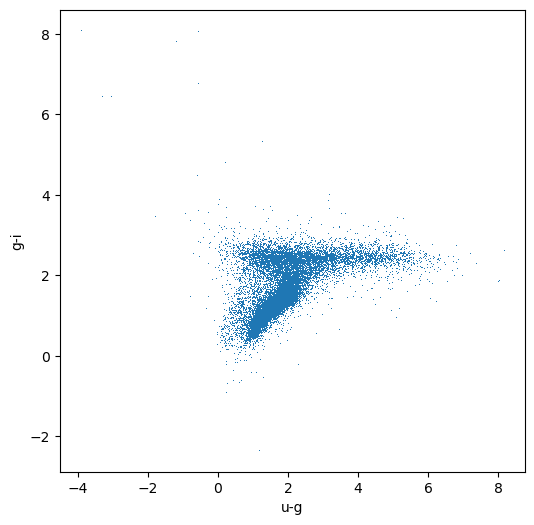

In [2]:
## First, filter data

sdss_data = SDSSgals[(SDSSgals['ug']>-5)&(SDSSgals['ug']<20)&
                     (SDSSgals['gi']>-5)&(SDSSgals['gi']<20)&
                     (SDSSgals['gr']>-5)&(SDSSgals['gr']<20)&
                     (SDSSgals['gz']>-5)&(SDSSgals['gz']<20)&
                     (SDSSgals['petroR50_i']<20)&(SDSSgals['petroRad_i']<50)]
print(len(SDSSgals),len(sdss_data))
## Visualize data for Maggie - not part of question

plt.figure(figsize=(6,6))
plt.plot(sdss_data['ug'],sdss_data['gi'],',')
plt.xlabel('u-g')
plt.ylabel('g-i');
np.min(SDSSgals['ug'])

(array([ 1944.,   757.,   662.,   688.,   691.,   752.,   888.,  1115.,
         1481., 10985.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

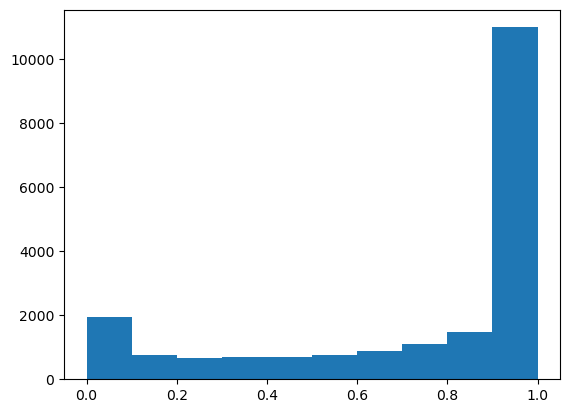

In [3]:
plt.hist(sdss_data['fracDev_i'])

''

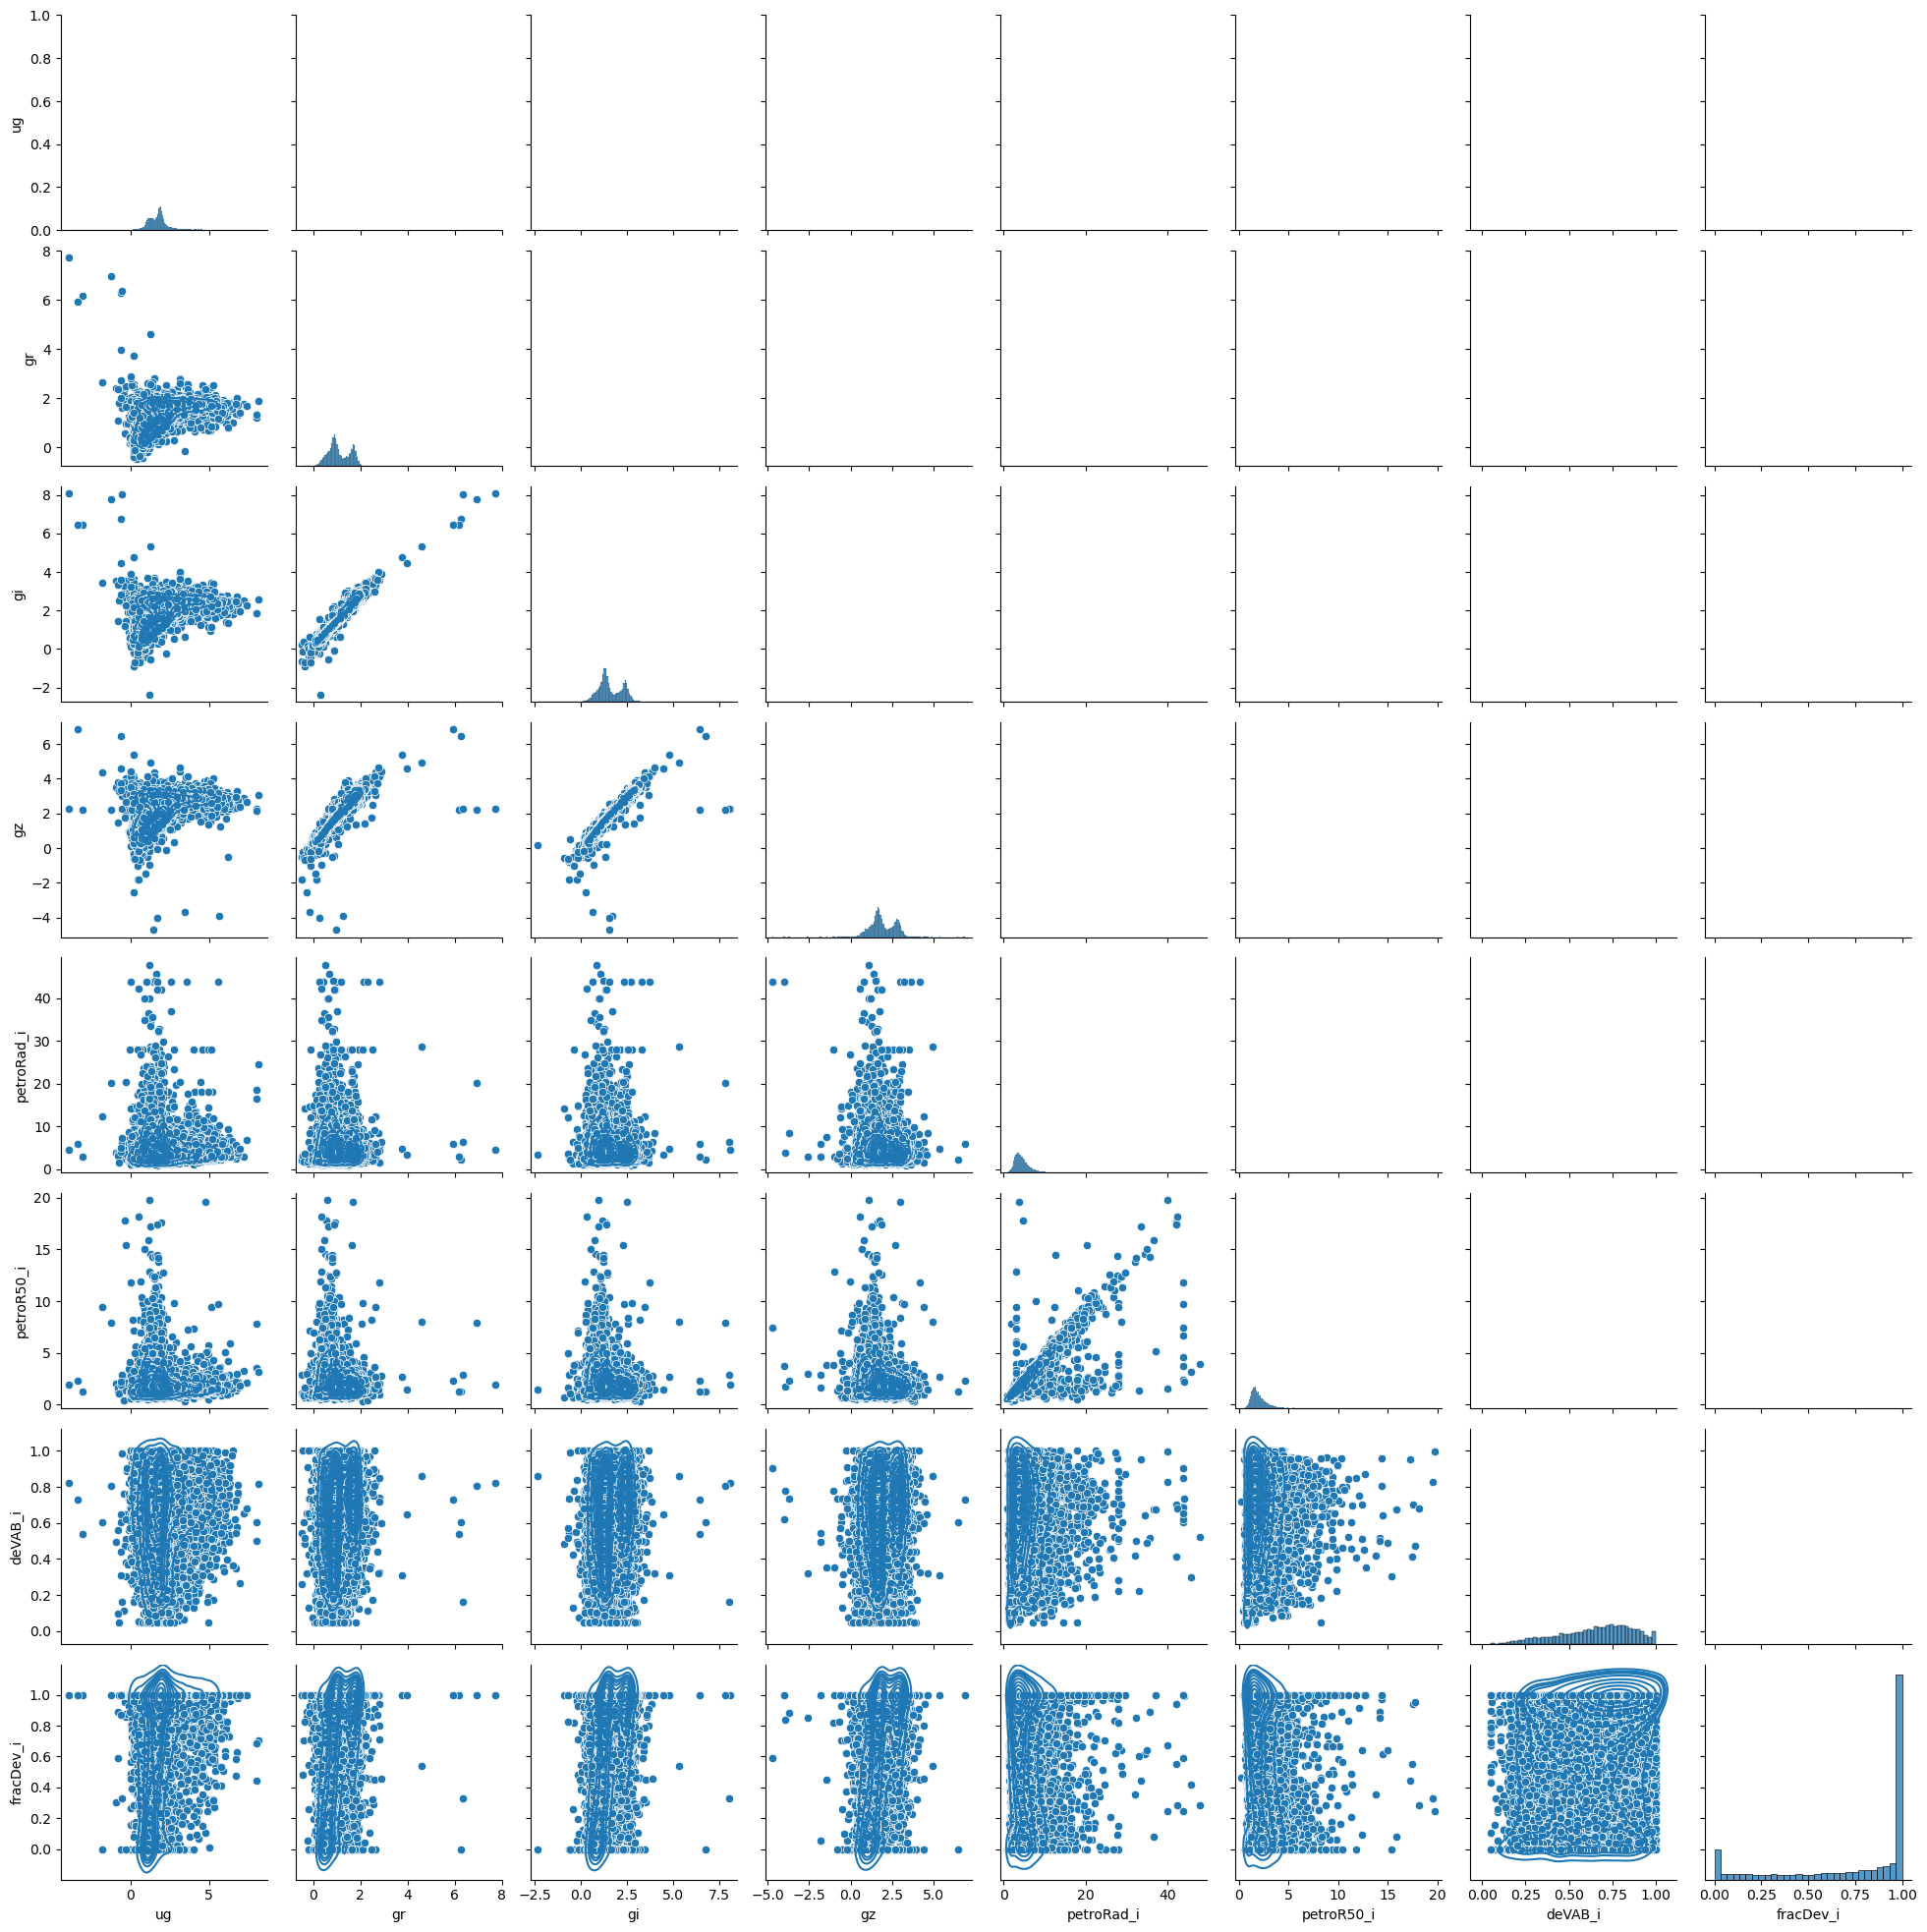

In [4]:
## Plot with PairGrid

import seaborn as sns

sdss_df = sdss_data.to_pandas()

pg = sns.PairGrid(sdss_df)
pg.map_diag(sns.histplot)
#pg.map_diag(sns.kdeplot)
pg.map_lower(sns.kdeplot)
pg.map_lower(sns.scatterplot)
;

### 1b - Separating the galaxy types (11 pts) 

Using K-means from `sklearn` with n=3, separate the three clusters of galaxies. Initial guesses, hyper-paramter tuning, dimensionality reduction etc are your choices. What's important is to be able to justify them. To the referee, to me, to yourself. We'll do that in the next part. 

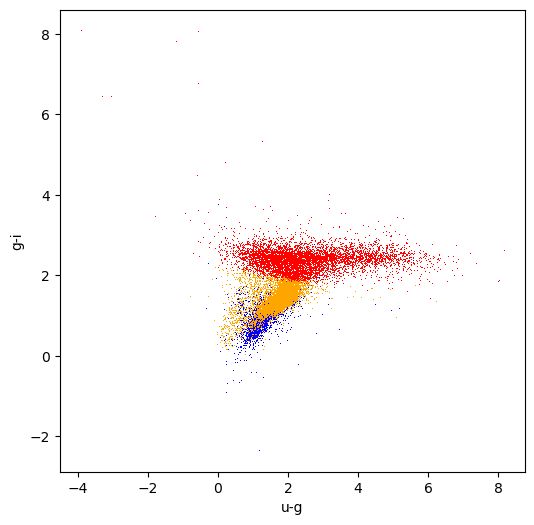

In [5]:
## Create three galaxy clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Scale

z = StandardScaler()
sdss_fit = z.fit_transform(sdss_df)

kmeans = KMeans(n_clusters=3, random_state=0, n_init=3, algorithm='lloyd').fit(sdss_fit)

plt.figure(figsize=(6,6))
plt.plot(sdss_df['ug'][kmeans.labels_==0],sdss_df['gi'][kmeans.labels_==0],',',color='blue')
plt.plot(sdss_df['ug'][kmeans.labels_==1],sdss_df['gi'][kmeans.labels_==1],',',color='red')
plt.plot(sdss_df['ug'][kmeans.labels_==2],sdss_df['gi'][kmeans.labels_==2],',',color='orange')
plt.xlabel('u-g')
plt.ylabel('g-i');


### 1c - Working with the distributions (11 pts)
Repeat 1a, but using the results of K-means in 1b to create separately colored distributions for your different classes of galaxies. Use the KDE to provide the mean values of each feature and their standard deviation (hint - these are integrals), and compare them to the sample means and standard deviations. 

In [6]:
## Add label to dataframe for later plotting

sdss_df['kmeans_lab'] = kmeans.labels_

''

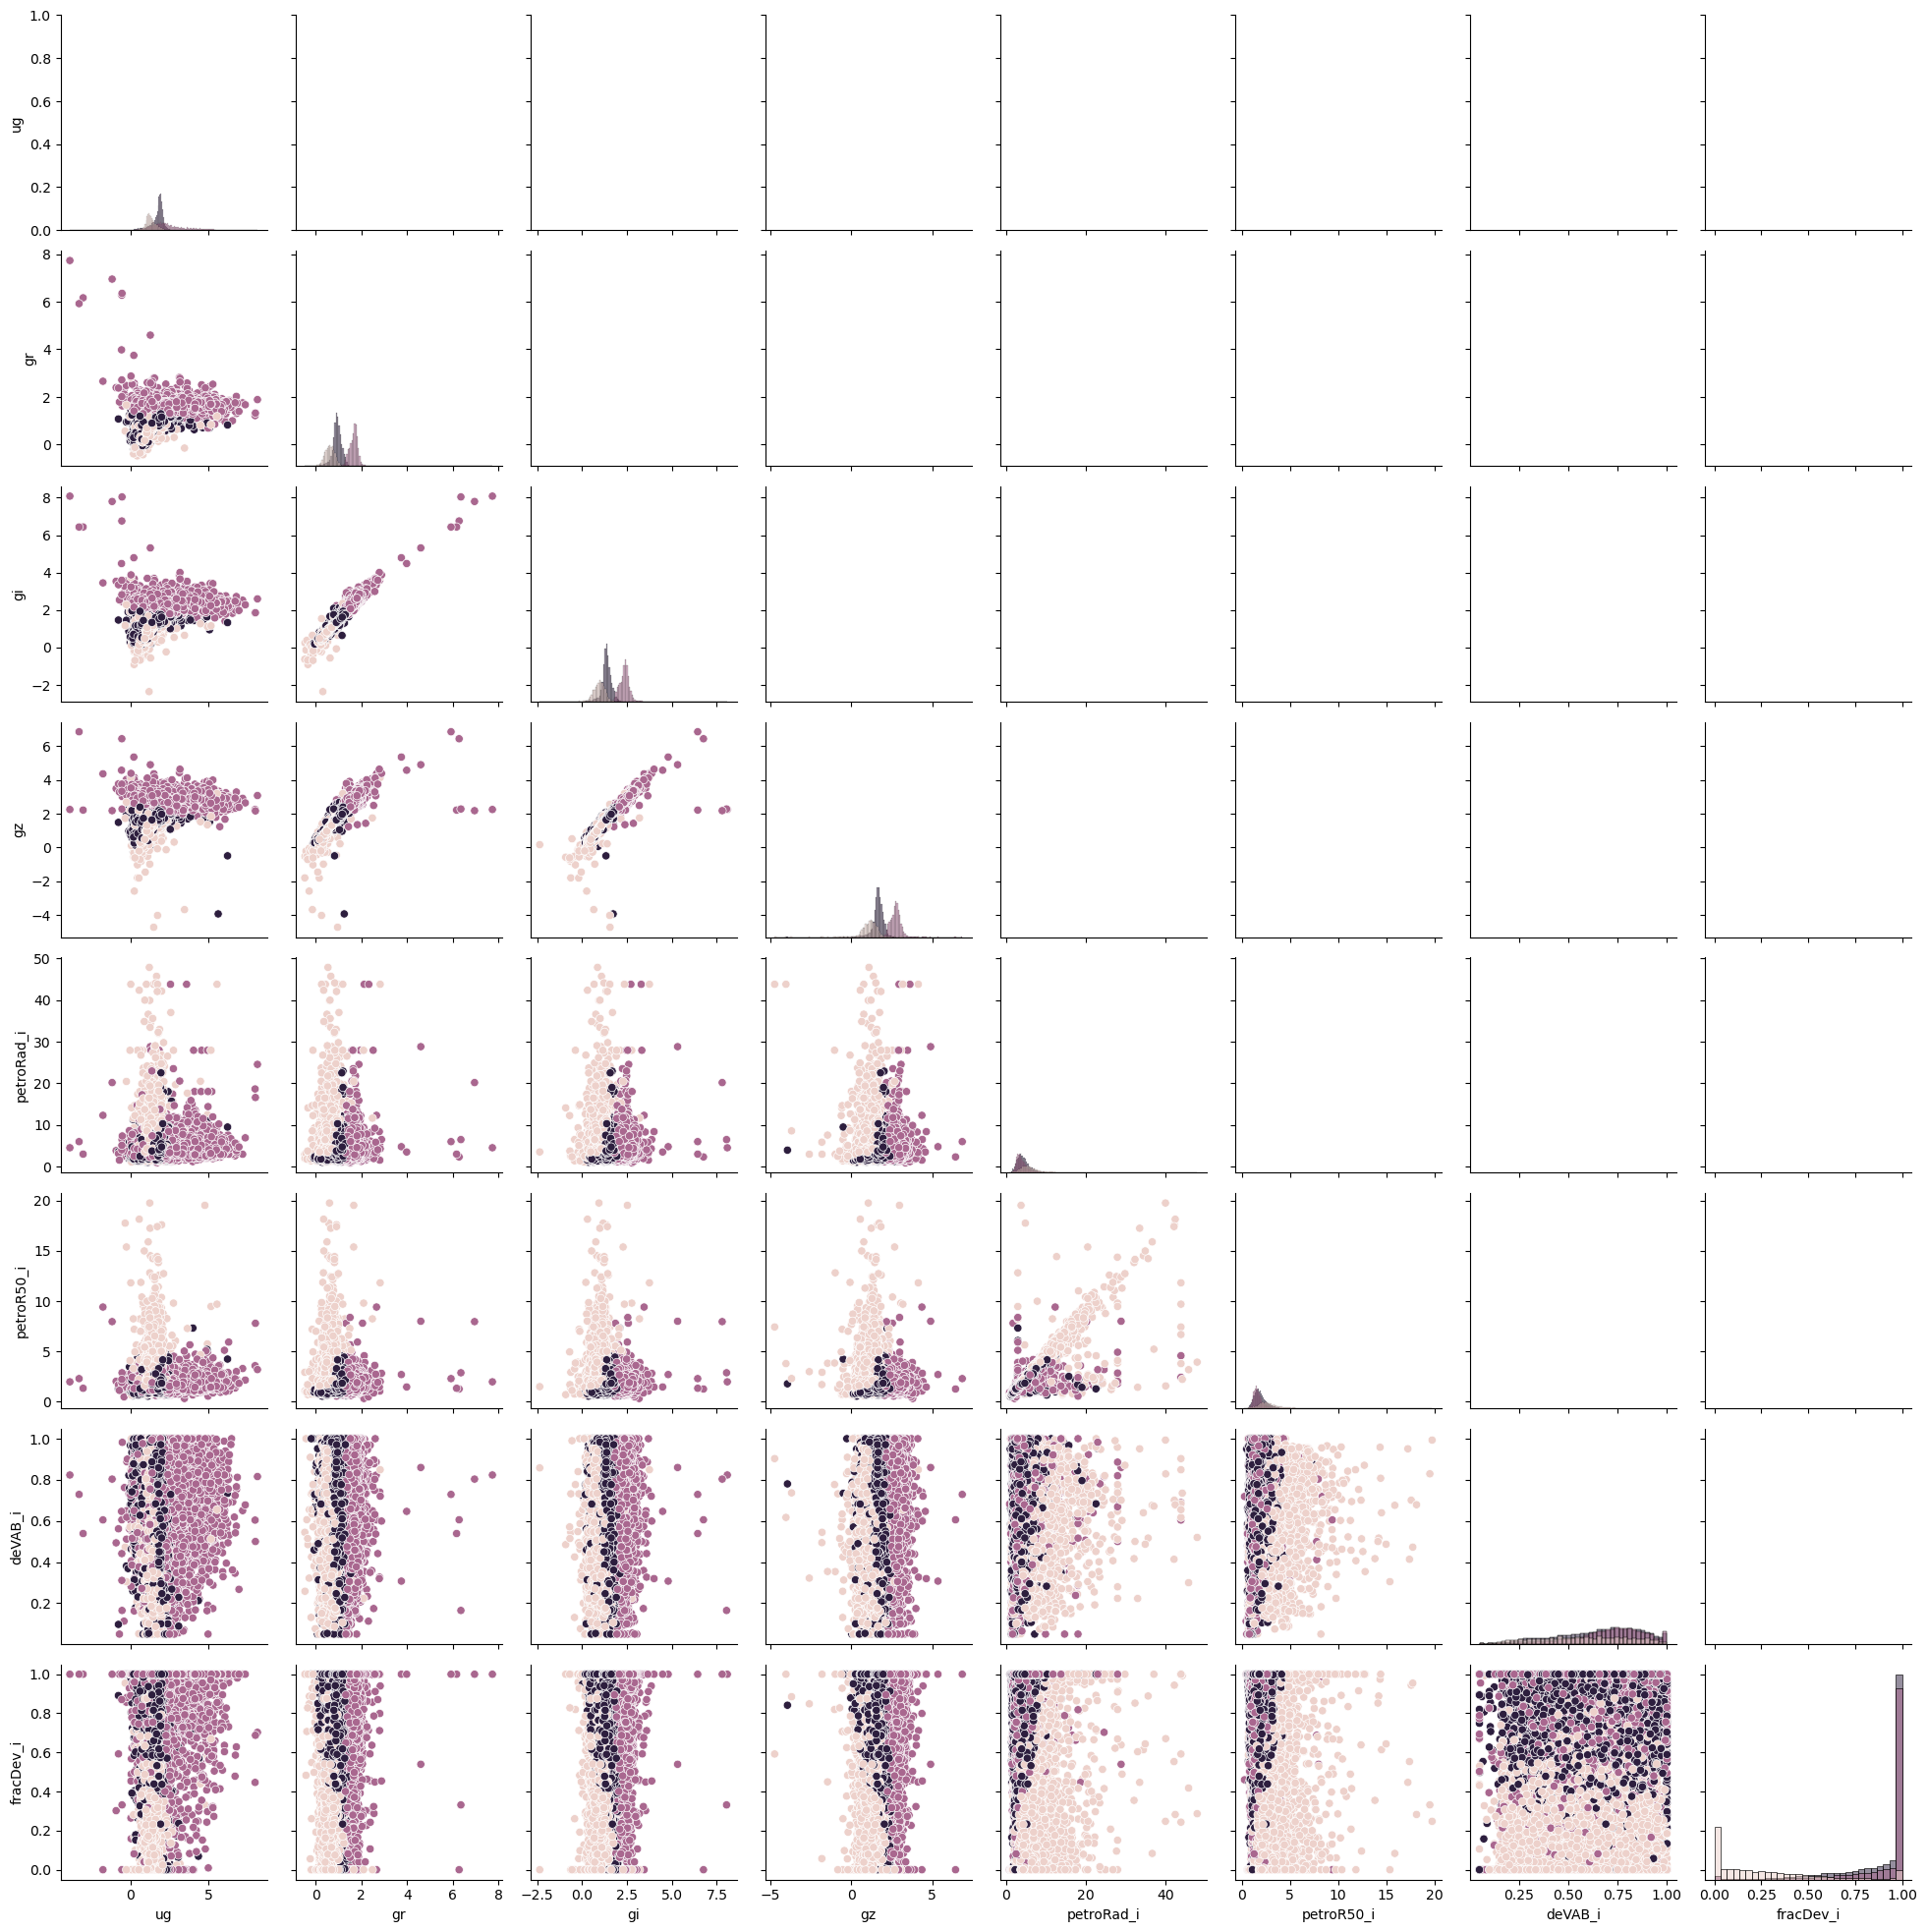

In [7]:
pg = sns.PairGrid(sdss_df,hue='kmeans_lab')
pg.map_diag(sns.histplot)
#pg.map_diag(sns.kdeplot)
#pg.map_lower(sns.kdeplot)
pg.map_lower(sns.scatterplot)
;

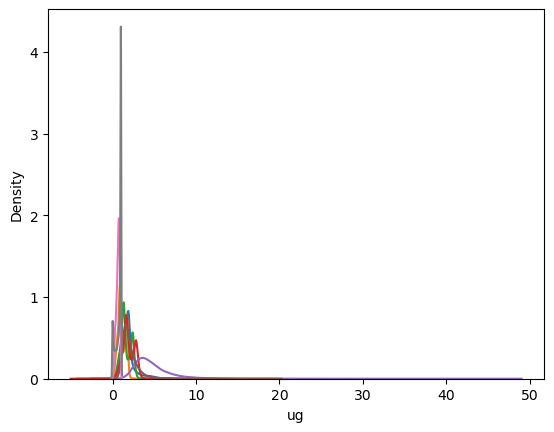

In [8]:
## Determine means, standard deviation of each feature, then compare to sample mean/std

ug_kde = sns.kdeplot(sdss_df,x=sdss_df['ug'])
gr_kde = sns.kdeplot(sdss_df,x=sdss_df['gr'])
gi_kde = sns.kdeplot(sdss_df,x=sdss_df['gi'])
gz_kde = sns.kdeplot(sdss_df,x=sdss_df['gz'])
PetroRad_i_kde = sns.kdeplot(sdss_df,x=sdss_df['petroRad_i'])
PetroR50_i_kde = sns.kdeplot(sdss_df,x=sdss_df['petroR50_i'])
deVAB_i_kde = sns.kdeplot(sdss_df,x=sdss_df['deVAB_i'])
fracDev_i_kde = sns.kdeplot(sdss_df,x=sdss_df['fracDev_i'])

In [9]:
ug_x = ug_kde.lines[0].get_xdata()
ug_y = ug_kde.lines[0].get_ydata()

mean_int = np.sum(ug_x[1:]*ug_y[1:]*(ug_x[1:]-ug_x[:-1]))
mean_cheat = np.mean(sdss_df['ug']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((ug_x[1:]-mean_int)**2)*ug_y[1:]*(ug_x[1:]-ug_x[:-1])))
std_cheat = np.std(sdss_df['ug'])

print('ug Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('ug Std: ',std_int,'Check: ',std_int-std_cheat)

gr_x = gr_kde.lines[0].get_xdata()
gr_y = gr_kde.lines[0].get_ydata()

mean_int = np.sum(gr_x[1:]*gr_y[1:]*(gr_x[1:]-gr_x[:-1]))
mean_cheat = np.mean(sdss_df['gr']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((gr_x[1:]-mean_int)**2)*gr_y[1:]*(gr_x[1:]-gr_x[:-1])))
std_cheat = np.std(sdss_df['gr'])

print('gr Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('gr Std: ',std_int,'Check: ',std_int-std_cheat)

gi_x = gi_kde.lines[0].get_xdata()
gi_y = gi_kde.lines[0].get_ydata()

mean_int = np.sum(gi_x[1:]*gi_y[1:]*(gi_x[1:]-gi_x[:-1]))
mean_cheat = np.mean(sdss_df['gi']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((gi_x[1:]-mean_int)**2)*gi_y[1:]*(gi_x[1:]-gi_x[:-1])))
std_cheat = np.std(sdss_df['gi'])

print('gi Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('gi Std: ',std_int,'Check: ',std_int-std_cheat)

gz_x = gz_kde.lines[0].get_xdata()
gz_y = gz_kde.lines[0].get_ydata()

mean_int = np.sum(gz_x[1:]*gz_y[1:]*(gz_x[1:]-gz_x[:-1]))
mean_cheat = np.mean(sdss_df['gz']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((gz_x[1:]-mean_int)**2)*gz_y[1:]*(gz_x[1:]-gz_x[:-1])))
std_cheat = np.std(sdss_df['gz'])

print('gz Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('gz Std: ',std_int,'Check: ',std_int-std_cheat)

PetroRad_i_x = PetroRad_i_kde.lines[0].get_xdata()
PetroRad_i_y = PetroRad_i_kde.lines[0].get_ydata()

mean_int = np.sum(PetroRad_i_x[1:]*PetroRad_i_y[1:]*(PetroRad_i_x[1:]-PetroRad_i_x[:-1]))
mean_cheat = np.mean(sdss_df['petroRad_i']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((PetroRad_i_x[1:]-mean_int)**2)*PetroRad_i_y[1:]*(PetroRad_i_x[1:]-PetroRad_i_x[:-1])))
std_cheat = np.std(sdss_df['petroRad_i'])

print('PetroRad_i Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('PetroRad_i Std: ',std_int,'Check: ',std_int-std_cheat)

PetroR50_i_x = PetroR50_i_kde.lines[0].get_xdata()
PetroR50_i_y = PetroR50_i_kde.lines[0].get_ydata()

mean_int = np.sum(PetroR50_i_x[1:]*PetroR50_i_y[1:]*(PetroR50_i_x[1:]-PetroR50_i_x[:-1]))
mean_cheat = np.mean(sdss_df['petroR50_i']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((PetroR50_i_x[1:]-mean_int)**2)*PetroR50_i_y[1:]*(PetroR50_i_x[1:]-PetroR50_i_x[:-1])))
std_cheat = np.std(sdss_df['petroR50_i'])

print('PetroR50_i Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('PetroR50_i Std: ',std_int,'Check: ',std_int-std_cheat)

deVAB_i_x = deVAB_i_kde.lines[0].get_xdata()
deVAB_i_y = deVAB_i_kde.lines[0].get_ydata()

mean_int = np.sum(deVAB_i_x[1:]*deVAB_i_y[1:]*(deVAB_i_x[1:]-deVAB_i_x[:-1]))
mean_cheat = np.mean(sdss_df['deVAB_i']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((deVAB_i_x[1:]-mean_int)**2)*deVAB_i_y[1:]*(deVAB_i_x[1:]-deVAB_i_x[:-1])))
std_cheat = np.std(sdss_df['deVAB_i'])

print('deVAB_i Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('deVAB_i Std: ',std_int,'Check: ',std_int-std_cheat)

fracDev_i_x = fracDev_i_kde.lines[0].get_xdata()
fracDev_i_y = fracDev_i_kde.lines[0].get_ydata()

mean_int = np.sum(fracDev_i_x[1:]*fracDev_i_y[1:]*(fracDev_i_x[1:]-fracDev_i_x[:-1]))
mean_cheat = np.mean(sdss_df['fracDev_i']) ## To make sure my answer is what I expect

std_int = np.sqrt(np.sum(((fracDev_i_x[1:]-mean_int)**2)*fracDev_i_y[1:]*(fracDev_i_x[1:]-fracDev_i_x[:-1])))
std_cheat = np.std(sdss_df['fracDev_i'])

print('fracDev_i Mean: ',mean_int,'Check: ',mean_int-mean_cheat)
print('fracDev_i Std: ',std_int,'Check: ',std_int-std_cheat)


ug Mean:  1.8838456662793583 Check:  3.8117581691032854e-07
ug Std:  0.9161676857096785 Check:  0.008600975170364178
gr Mean:  1.8838456662793583 Check:  0.7740521720259896
gr Std:  0.9161676857096785 Check:  0.4434504296107982
gi Mean:  1.8838456662793583 Check:  0.2728420027793834
gi Std:  0.9161676857096785 Check:  0.28594872492519086
gz Mean:  1.8838456662793583 Check:  -0.04752292763813881
gz Std:  0.9161676857096785 Check:  0.20105320490455914
PetroRad_i Mean:  1.8838456662793583 Check:  -3.030841814630324
PetroRad_i Std:  0.9161676857096785 Check:  -2.011132656275818
PetroR50_i Mean:  1.8838456662793583 Check:  -0.22404082848595763
PetroR50_i Std:  0.9161676857096785 Check:  -0.19975212890667993
deVAB_i Mean:  1.8838456662793583 Check:  1.226866668400783
deVAB_i Std:  0.9161676857096785 Check:  0.7066858835419328
fracDev_i Mean:  1.8838456662793583 Check:  1.140017056149959
fracDev_i Std:  0.9161676857096785 Check:  0.5733192495192623


### Q2. Gaussian Processes + Emcee

There are many sources with periodic light curves that are not strictly sinusoidal. Thus, the use of the cosine kernel (on its own) may not be sufficient to model the signal. The quasi-periodic kernel: 

$$K_{ij} = k(x_i - x_j) = A \exp \left(-\Gamma \sin^2\left[\frac{\pi}{P} \left|x_i - x_j\right|\right]\right)$$

is useful for non-sinusoidal signals. It is implemented in the `george` package. Note that the parameters in the kernel aren't the only parameters you might need... look back on your previous homework assignments and think about what I'm glossing over here. 

I've given you an example light curve file with a decidedly non-sinusoidal, periodic signal from the ASAS-SN project from our colleagues at OSU. 

### 2a - Implement the model  (11 pts)

Examine this data, filter it as you see fit (I've included the file header in full - I'd pick one aperture, and look at the grades and notes about separate datasets). You can make tradeoffs here - more data that is potentially messier, vs less data so weaker constraints, but cleaner. Pick something that you can justify (and if you're struggling at 2c, examine this choice before twiddling with emcee). 

Write down a model for it with the likelihood function, an appropriate prior and posterior.

You may wish to look at the `george` documentation again, particularly how some parameters are better log transformed if the expectation is that they are positive real values. 

https://george.readthedocs.io/en/latest/tutorials/model/

In [3]:
from george.modeling import Model
from george.kernels import ExpSine2Kernel
import george
import numpy.random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Implement model
class Mag_Model(Model):
    parameter_names = ('m')

    def get_value(self, t):
        t = t.flatten()
        
        # from hw 6
        mean_model = np.repeat(self.m, len(t))
        
        return mean_model
    
## Define kernel based on above equation

def kernel(params):
    A,gamma,P,m = params
    return A*ExpSine2Kernel(gamma,P,ndim=1) ##
                                                ## 
## Bayesian stuff

def lnprior(A,gamma,P,m):
    
    if (A>np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1'])) or (A<0):
        return -np.inf
        
    if (gamma>np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1'])) or \
    (gamma<np.min(asas_data['MAG_1'])-np.max(asas_data['MAG_1'])):
        return -np.inf
        
    if (P>np.max(asas_data['HJD'])-np.min(asas_data['HJD'])) or (P<0):
        return -np.inf
    
    if (m>np.max(asas_data['MAG_1'])) or (m<np.min(asas_data['MAG_1'])):
        return -np.inf
    
    else:  ## to be tweaked
        
        p_A = random.uniform(low=0,high=np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1']))
        p_gamma = random.uniform(low=np.min(asas_data['MAG_1'])-np.max(asas_data['MAG_1']),
                                high=np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1']))
        p_P = random.uniform(low=0,high=np.max(asas_data['HJD'])-np.min(asas_data['HJD']))
        p_m = random.uniform(low=np.min(asas_data['MAG_1']),high=np.max(asas_data['MAG_1']))
        
        
        return p_A*p_gamma*p_P*p_m

def lnprob(A,gamma,P,m):
    model.set_parameter_vector(np.array([A,gamma,P,m]),include_frozen=False)
    return model.log_likelihood(y, quiet=True) + lnprior(A,gamma,P,m)


def lnposterior(params): ## From emcee_full_example
    A,gamma,P,m = params
    lnlike = lnprob(A,gamma,P,m)
    logprior = lnprior(A,gamma,P,m)
    lnposterior = lnlike + logprior
    return lnposterior

#model = george.GP(mean=PolynomialModel(m=0, b=0, amp=-1, location=0.1, log_sigma2=np.log(0.4)))
#model.compute(t, yerr)




Text(0.5, 1.0, 'Light Curve in Band 1')

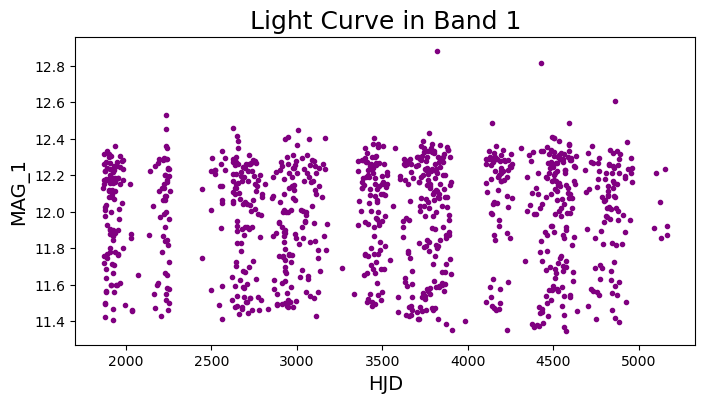

In [4]:
## Import data

asas_data_1 = pd.read_csv('asas_data.dat',header=53,nrows=227,sep=' ',skipinitialspace=True, engine='c')
asas_data_1 = asas_data_1[['HJD', 'MAG_0', 'MAG_1', 'MAG_2', 'MAG_3', 'MAG_4', 'MER_0', 'MER_1',
                            'MER_2', 'MER_3', 'MER_4', 'GRADE', 'FRAME']]
asas_data_2 = pd.read_csv('asas_data.dat',header=304,nrows=477,sep=' ',skipinitialspace=True, engine='c')
asas_data_3 = pd.read_csv('asas_data.dat',header=756,nrows=10,sep=' ',skipinitialspace=True, engine='c')
asas_data_4 = pd.read_csv('asas_data.dat',header=789,nrows=16,sep=' ',skipinitialspace=True, engine='c')
asas_data_5 = pd.read_csv('asas_data.dat',header=828,nrows=22,sep=' ',skipinitialspace=True, engine='c')
asas_data_6 = pd.read_csv('asas_data.dat',header=874,nrows=15,sep=' ',skipinitialspace=True, engine='c')
asas_data_7 = pd.read_csv('asas_data.dat',header=912,nrows=574,sep=' ',skipinitialspace=True, engine='c')

## Join to 1 data frame
asas_data = pd.concat([asas_data_1,asas_data_2,asas_data_3,asas_data_4,asas_data_5,asas_data_6,asas_data_7],
                     ignore_index=True)

## Get rid of weird stuff in data frame
asas_data = asas_data.dropna()
asas_data = asas_data[asas_data.index!=678]
asas_data['HJD'] = np.array(asas_data['HJD'],dtype=float)

## Remove stuff with big error in magnitude - I will use aperture 1
asas_data['MER_1'] = np.array(asas_data['MER_1'],dtype=float)
asas_data = asas_data[asas_data['MER_1']<0.05]

## Also remove outliers in MAG_1
asas_data['MAG_1'] = np.array(asas_data['MAG_1'],dtype=float)
asas_data = asas_data[asas_data['MAG_1']<20]

## See what sort of variation we're dealing with
plt.figure(figsize=(8,4))
plt.plot(asas_data['HJD'],asas_data['MAG_1'],'.',color='purple')
plt.xlabel('HJD',fontsize=14)
plt.ylabel('MAG_1',fontsize=14)
plt.title('Light Curve in Band 1',fontsize=18)



### 2b - Initial Guesses (11 pts)

Make some initial guess for the parameters. For the period, use Lomb-Scargle to find the top three periods for this light curve. Initialize 1/3rd of the walkers to each of the top three periods

Do the burn in with `emcee` - a 100 walkers and a 1000 steps should be plenty - you should find that the walkers have migrated away from the starting guess. Plot the chains. 

Make a plot of the log of the Posterior vs the log of the Period - select the periods with the highest log Posterior and change the initial guess for the Period of all the walkers to be in a small region around the Period with the highest log Posterior. 

Top three periods:  [  7.83691345 378.9643092    2.18647754]  days


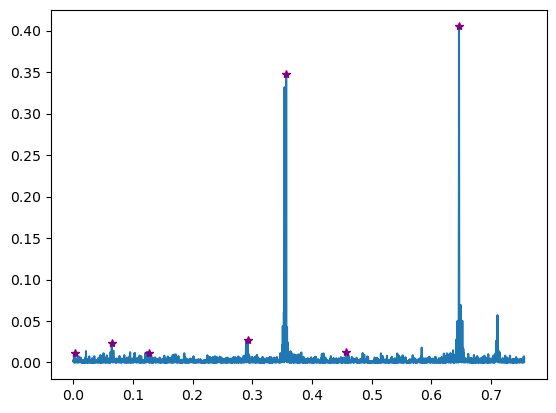

In [5]:
## It's scargling time

from astropy.timeseries import LombScargle
from scipy.signal import find_peaks, find_peaks_cwt

frequency, power = LombScargle(asas_data['HJD'], asas_data['MAG_1']).autopower()

plt.plot(frequency, power) 

## Find peaks

idx_p = find_peaks(power,height=.01,distance=1000)[0]

peak_frame = pd.DataFrame({'idx_p':idx_p,'frequency':frequency[idx_p],
                           'period':1/frequency[idx_p],'power':power[idx_p]})

## Remove resonances

period_sort = peak_frame.sort_values(by='period')

## Check if 1/2 or 1/3 

mask_2 = np.full(len(period_sort),True)
mask_3 = np.full(len(period_sort),True)

for i in range(len(period_sort)):
    for j in range(len(period_sort)):
        if np.isclose(period_sort.period[i]/2,period_sort.period[j],atol=0.01):
            mask_2[j] = False
        else:
            continue
            
for k in range(len(period_sort)):
    for l in range(len(period_sort)):
        if np.isclose(period_sort.period[k]/3,period_sort.period[l],atol=0.01):
            mask_3[l] = False
        else:
            continue

#peak_p = np.array(asas_data['HJD'])[idx_p]
plt.plot(frequency[idx_p][mask_2&mask_3],power[idx_p][mask_2&mask_3],'*',color='purple')

top3 = np.array(peak_frame[mask_2&mask_3].sort_values(by='power')['period'].iloc[:3])

print('Top three periods: ',top3,' days')


In [6]:
## Initial guesses

mean_guess = np.mean(asas_data['MAG_1'])
gamma_guess = np.max(asas_data['MAG_1'][asas_data['HJD']>4500])-np.max(
    asas_data['MAG_1'][asas_data['HJD']<2500]) 
P_guess = top3 ## days ## Based on where we get high concentrations of dots
A_guess = (np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1']))/2

## Scale param for walkers - I'm going to go super wide here and then refine

sigma_m = (np.max(asas_data['MAG_1'])-np.min(asas_data['MAG_1']))/2
sigma_gamma = 1
sigma_P = 300
sigma_A = 1

''

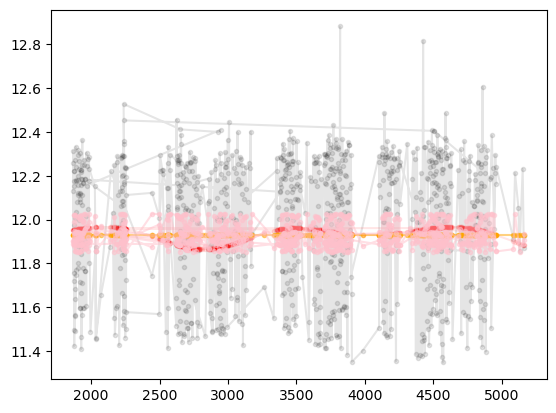

In [7]:
## Plot initial guesses and tweak

## code from hw 6

p0_1 = [A_guess,gamma_guess,P_guess[0],mean_guess]
p0_2 = [A_guess,gamma_guess,P_guess[1],mean_guess]
p0_3 = [A_guess,gamma_guess,P_guess[2],mean_guess]
sigma = np.array([sigma_A, sigma_gamma, sigma_P, sigma_m])

everyn = 30
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
t = asas_data['HJD'][::everyn]
y = asas_data['MAG_1'][::everyn]
yerr = asas_data['MER_1'][::everyn]

model = george.GP(mean=Mag_Model(p0_1[0]), kernel=kernel(p0_1))
model.compute(t,yerr)
pred = model.predict(y, asas_data['HJD'], return_cov=False)

model1 = george.GP(mean=Mag_Model(p0_1[0]), kernel=kernel(p0_1))
model1.compute(t, yerr)
pred1 = model1.predict(y, asas_data['HJD'], return_cov=False)

model2 = george.GP(mean=Mag_Model(p0_2[0]), kernel=kernel(p0_2))
model2.compute(t, yerr)
pred2 = model2.predict(y, asas_data['HJD'], return_cov=False)

model3 = george.GP(mean=Mag_Model(p0_3[0]), kernel=kernel(p0_3))
model3.compute(t, yerr)
pred3 = model3.predict(y, asas_data['HJD'], return_cov=False)

ax2.plot(asas_data['HJD'], asas_data['MAG_1'], color='k',marker='.',alpha=0.1)
ax2.plot(asas_data['HJD'], pred1, color='red',marker='.',alpha=0.1)
ax2.plot(asas_data['HJD'], pred2, color='orange',marker='.',alpha=0.5)
ax2.plot(asas_data['HJD'], pred3, color='pink',marker='.',alpha=0.5)
;

In [8]:
## Burn-in with emcee: 100 walkers and a 1000 steps

import emcee
import corner
from tqdm import tqdm

nwalkers=100
ndim=len(p0_1)

p0_input = np.zeros((100,4))

p0_input[0:33] = p0_1 + 0.01*sigma*np.random.randn(33, ndim)
p0_input[34:67] = p0_2 + 0.01*sigma*np.random.randn(33, ndim)
p0_input[68:101] = p0_3 + 0.01*sigma*np.random.randn(32, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnposterior)
state = sampler.run_mcmc(p0_input, 1000, progress=True, skip_initial_state_check=True) 

  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████████| 1000/1000 [01:18<00:00, 12.73it/s]


Text(0.5, 0, 'Step')

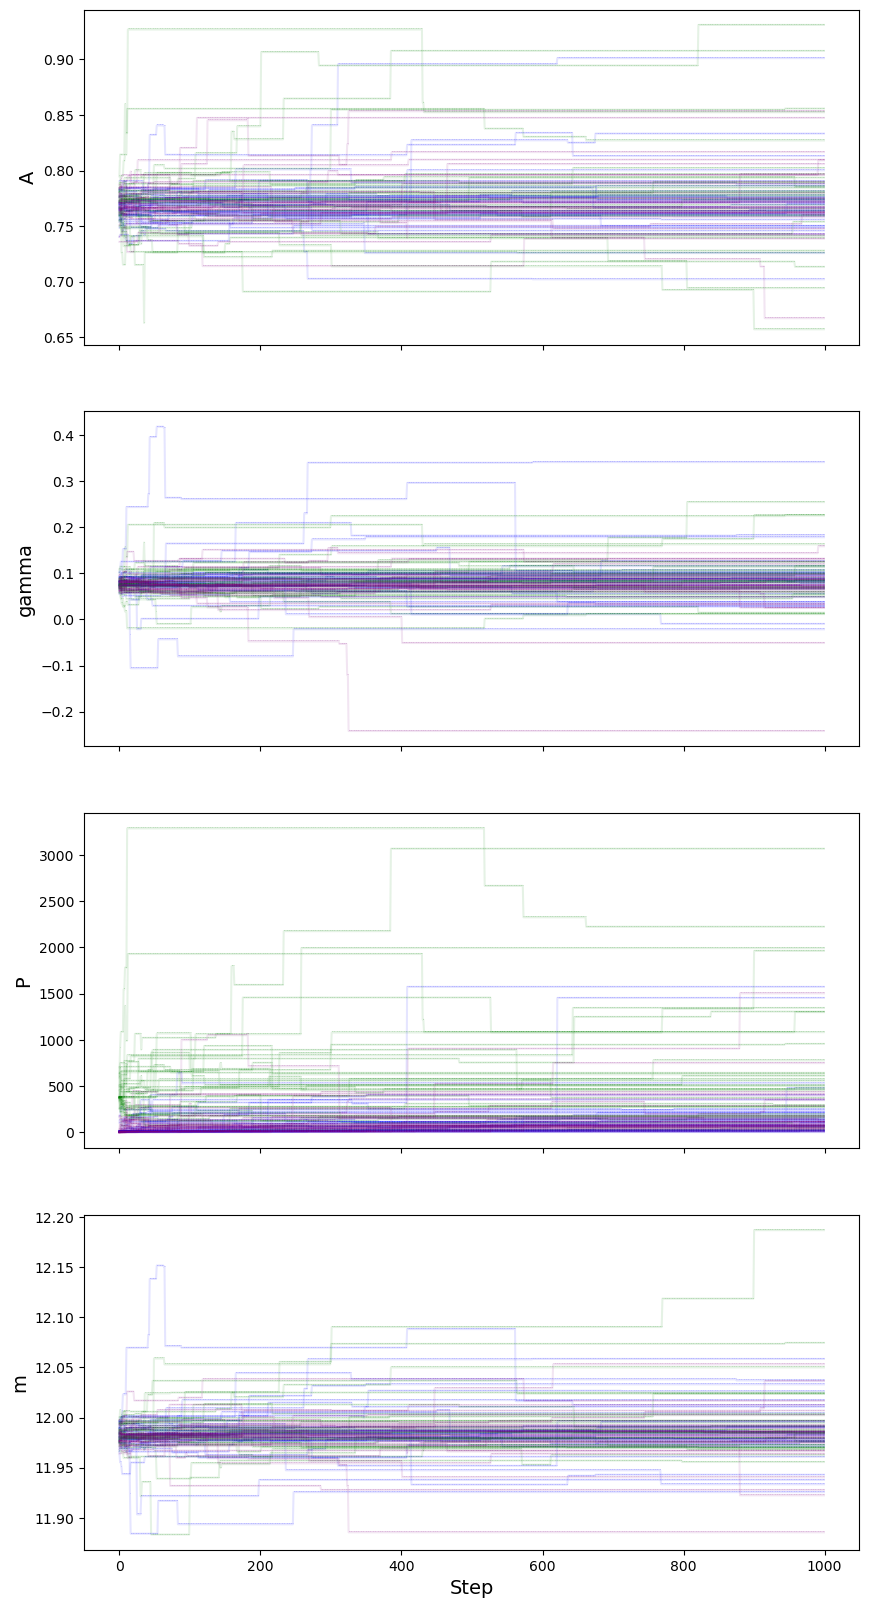

In [9]:
# Plot chains A,gamma,P,m

sample = sampler.chain#[:, 1000:, :].reshape(-1, ndim)
sample = sample.swapaxes(0,1)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)
labels = ['A','gamma','P','m']
for i in range(4):
    ax = axs[i]
    ax.plot(sample[:,:33,i], marker=',', alpha=0.1, color='blue', label='Period: ')
    ax.plot(sample[:,34:67,i], marker=',', alpha=0.1, color='green', label='Period: ')
    ax.plot(sample[:,68:,i], marker=',', alpha=0.1, color='purple', label='Period: ')
    #ax.legend(fontsize=16)
    ax.set_ylabel(labels[i],fontsize=14)
    #ax.set_xlim(0, n_burn+10000)
    #ax.axvline(n_burn, color='green')
ax.set_xlabel('Step',fontsize=14)

Text(0.5, 1.0, 'Posterior of Period')

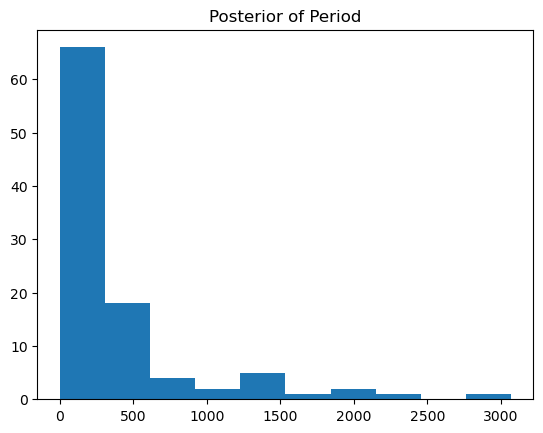

In [105]:
## Plot posterior
plt.hist(sample[999,:,2])
#plt.axvline(np.median(sample[999,:,3]),color='k')
plt.title('Posterior of Period')
#sample[999,:,3]

In [53]:
## Redo MC with new guess for period

period_guess = np.median(sample[999,:,3])

nwalkers = 100
nsteps = 2000

p1 = [np.median(sample[999,:,0]),np.median(sample[999,:,1]),np.median(sample[999,:,2]),
      np.median(sample[999,:,3])] + 0.01*sigma*np.random.randn(nwalkers,ndim)

sampler.reset()
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnposterior)
final_run = sampler.run_mcmc(p1, nsteps, progress=True, skip_initial_state_check=True) 

100%|███████████████████████████████████████| 2000/2000 [02:56<00:00, 11.35it/s]


### 2c - Infer the model parameters (11 pts)

Plot the chains, the corner plot, the folded lightcurve, the Gaussian process model given the median parameters, 10 other draws from the model and the uncertainty about the model. 


Text(0.5, 0, 'Step')

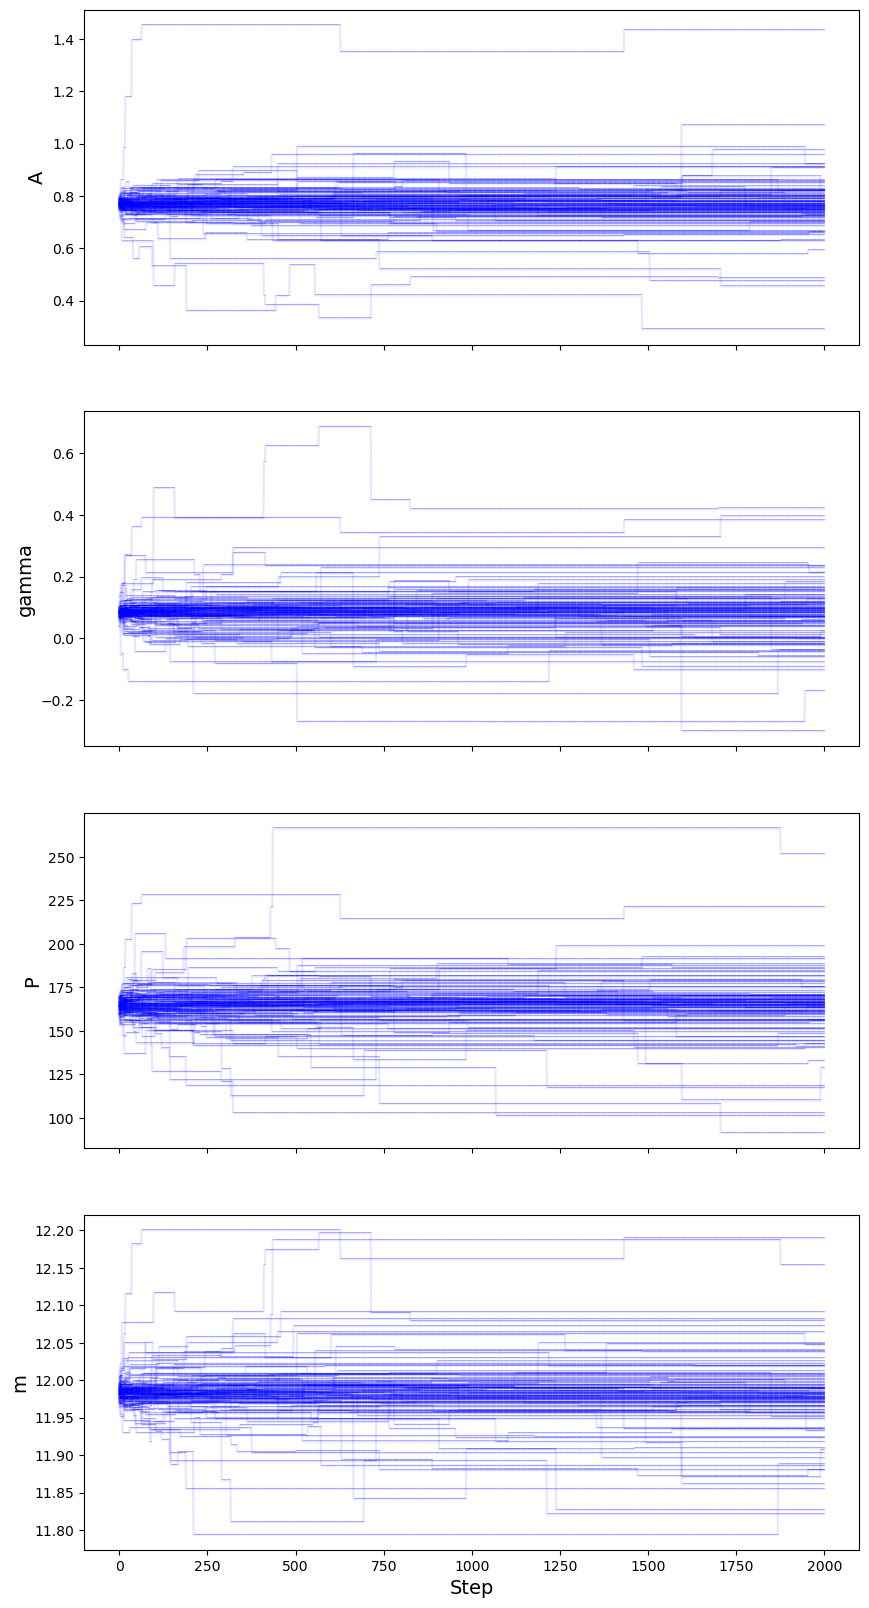

In [56]:
# Plot chains A,gamma,P,m

final_run_sample = sampler.chain#[:, 1000:, :].reshape(-1, ndim)
final_run_sample = final_run_sample.swapaxes(0,1)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)
labels = ['A','gamma','P','m']
for i in range(4):
    ax = axs[i]
    ax.plot(final_run_sample[:,:,i], marker=',', alpha=0.1, color='blue')
    #ax.legend(fontsize=16)
    ax.set_ylabel(labels[i],fontsize=14)
    #ax.set_xlim(0, n_burn+10000)
    #ax.axvline(n_burn, color='green')
ax.set_xlabel('Step',fontsize=14)

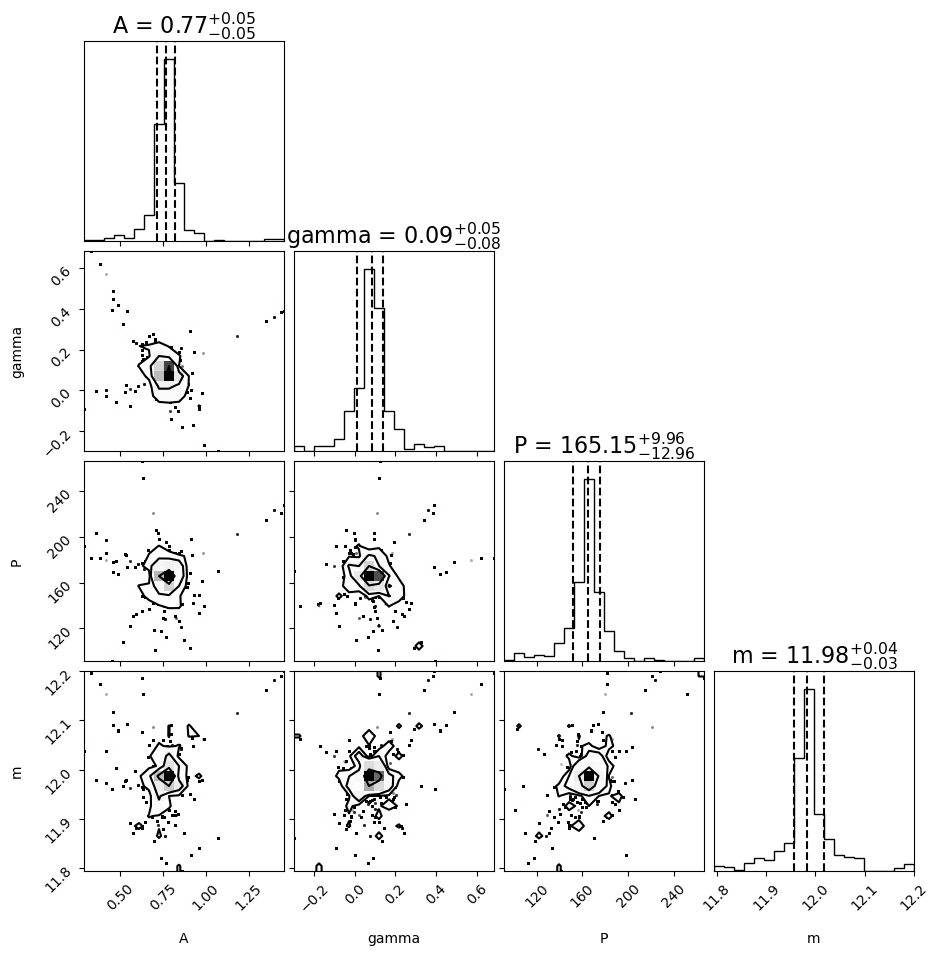

In [57]:
samp = final_run_sample.reshape((nwalkers*nsteps, ndim))
# make a corner plot
fig = corner.corner(samp, labels=labels, quantiles=[0.16, 0.5, 0.84],\
                       show_titles=True, title_kwargs={"fontsize": 16}) 

Text(0.5, 1.0, 'Folded Light Curve in Band 1')

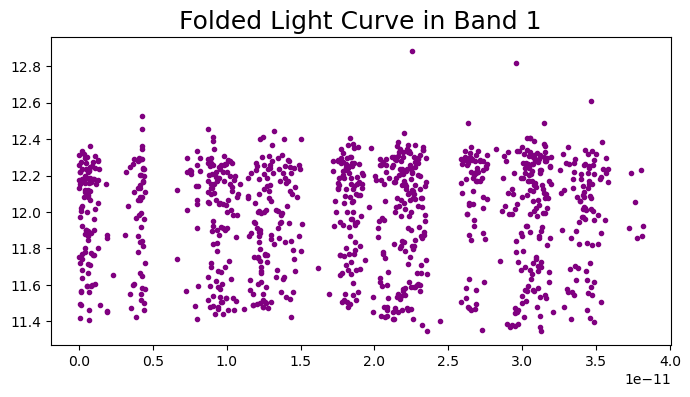

In [117]:
## Folded lightcurve that doesn't look folded

from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
import astropy.units as u

ts_df = asas_data[['HJD','MAG_1']]
ts_df.index = pd.DatetimeIndex(asas_data['HJD'])

ts = TimeSeries.from_pandas(ts_df)
ts_folded = ts.fold(period=np.mean(final_run_sample[1999,:,2])*u.day)#, epoch_time=transit_time) 

plt.figure(figsize=(8,4))
plt.plot(ts_folded.time.jd,ts_folded['MAG_1'],'.',color='purple')

plt.title('Folded Light Curve in Band 1',fontsize=18)

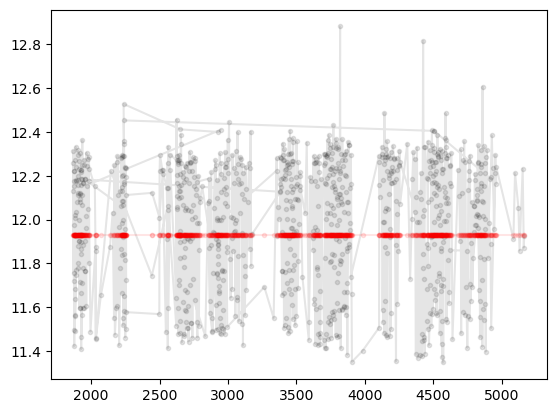

In [122]:
## GP model

model = george.GP(mean=Mag_Model(np.mean(final_run_sample[1999,:,0])), 
                                 kernel=kernel([np.mean(final_run_sample[1999,:,0]),
                                               np.mean(final_run_sample[1999,:,1]),
                                               np.mean(final_run_sample[1999,:,2]),
                                               np.mean(final_run_sample[1999,:,3])]))
model.compute(t,yerr)
pred = model.predict(y, asas_data['HJD'], return_cov=False)



plt.plot(asas_data['HJD'], asas_data['MAG_1'], color='k',marker='.',alpha=0.1)
plt.plot(asas_data['HJD'], pred, color='red',marker='.',alpha=0.1)

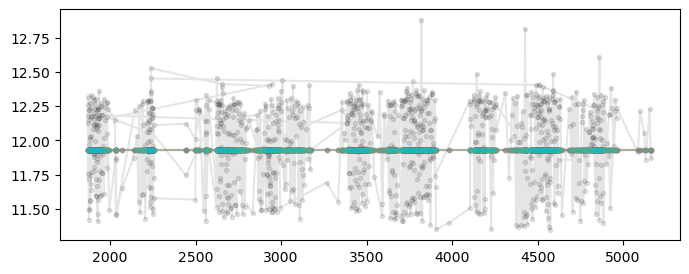

In [132]:
## 10 other draws from the model 
draws = np.random.randint(low=0,high=1999,size=10)

plt.figure(figsize=(8,3))
plt.plot(asas_data['HJD'], asas_data['MAG_1'], color='k',marker='.',alpha=0.1)

for i in range(len(draws)):
    model = george.GP(mean=Mag_Model(np.mean(final_run_sample[i,:,0])), 
                                 kernel=kernel([np.mean(final_run_sample[i,:,0]),
                                               np.mean(final_run_sample[i,:,1]),
                                               np.mean(final_run_sample[i,:,2]),
                                               np.mean(final_run_sample[i,:,3])]))
    model.compute(t,yerr)
    pred = model.predict(y, asas_data['HJD'], return_cov=False)

    plt.plot(asas_data['HJD'], pred, marker='.',alpha=0.1)

N.B. you should be a bit worried about "burn in" and how the walkers were initialized throughout. If you plan to use GPs to search for periods in your own work, I highly recommend you read Angus et al. 2018 on the GP periodogram. Angus et al. provide far more intelligent methods for initializing the MCMC than what is presented here. 

### Q3: PyMC (yes, that thing), hierarchical mixture models, and the mass-radius relation for small exoplanets

The mass-radius relation is a relationship between the radius $R$ of an exoplanet and its mass $M$. We usually call planets smaller than the Neptune size $(R < 4 R_{\oplus})$ small planets. In the Solar System, we don't have any planets between the Earth and Neptune sizes ($ 1-4 R_{\oplus}$), whereas in extrasolar systems, plenty of planets with radii in the range are observed. Thus, it's extremely intriguing to study the compositions of these planets and understand why we don't have one in the Solar System.

In this problem, you will work on one of the papers that one of our colloquium speakers brought up (this is why you should go to colloquium btw, because it'd have totally helped with this final exam to know the answer) - the mass-radius relation for small exoplanets around M-dwarfs. 

The paper is by [Luque et al., Science 377, 1211 (2022)](https://ui.adsabs.harvard.edu/abs/2022arXiv220903871L/abstract). We will reproduce some of their results using the PyMC.

In [133]:
## Download the dataset from Luque et al. 2022
data = pd.read_csv("https://carmenes.caha.es/ext/tmp/TMP.csv")
data.head()

ID  ID_Star      Star          AltName       Karmn     RA_J2000  \
0   1        1   GJ 3053         LHS 1140  J00449-152  00:44:59.33   
1   2        1   GJ 3053         LHS 1140  J00449-152  00:44:59.33   
2   3        2  TOI-1468  LSPM J0106+1913  J01066+192  01:06:36.98   
3   4        2  TOI-1468  LSPM J0106+1913  J01066+192  01:06:36.98   
4   5        3   GJ 3090          TOI-177         NaN  01:21:45.39   

      DE_J2000     SpT  SpTnum    d_pc  ...  eurho_gcm-3  edrho_gcm-3  Teq_K  \
0  -15:16:17.5  M4.5 V     4.5  14.964  ...         0.84         0.80  378.9   
1  -15:16:17.5  M4.5 V     4.5  14.964  ...         0.81         0.74  708.9   
2  +19:13:33.2    M3 V     3.0  24.721  ...         1.05         0.92  682.2   
3  +19:13:33.2    M3 V     3.0  24.721  ...         0.21         0.19  337.5   
4  -46:42:51.8    M2 V     2.0  22.454  ...         0.52         0.45  693.0   

   euTeq_K  edTeq_K     TSM   ESM  Method  DiscoveryRef       ParameterRef  
0      4.3      4.2    8.88  0.19      RV         Dit17  Dit17 Men19 Lil20  
1      8.0      7.8   25.90  3.45      RV         Dit17  Dit17 Men19 Lil20  
2      7.4      6.9    9.00  6.30      RV         Cha22              Cha22  
3      3.7      3.4   59.00   NaN      RV         Cha22              Cha22  
4     18.0     18.0  221.00   NaN      RV        Alm22a             Alm22a  

[5 rows x 44 columns]

In [134]:
## Lets extract mass and radius and their uncertainties from the data; both M and R are in Earth units 
M = data.M_Mterra
R = data.R_Rterra

err_M = (data.edM_Mterra+data.euM_Mterra)/2  # Assume the + and - errors on M and R are symmetric because lazy
err_R = (data.edR_Rterra+data.euR_Rterra)/2

ind = err_R < 1.
M = M[ind]
R = R[ind]
err_M = err_M[ind]
err_R = err_R[ind]
c=data['rho_gcm-3'][ind]

data = data[ind]

data['M'] = M
data['R'] = R
data['err_M'] = err_M
data['err_R'] = err_R
data['c'] = c

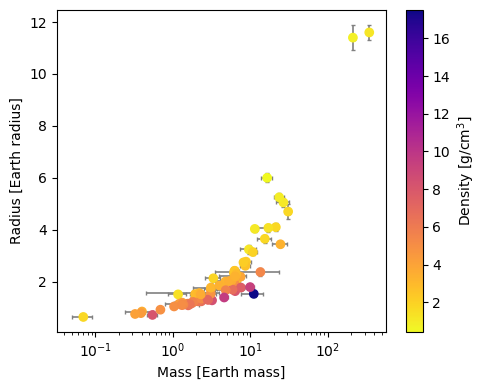

In [135]:
## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(5,4))
plt.errorbar(M, R, xerr=err_M, yerr=err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(M, R, c=c, zorder=100, cmap='plasma_r')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.tight_layout()
plt.show()

Exoplaneteers made up cute names to describe planets in different compositions.
- "Rocky world" if a planet has a bulk density similar to the Earth.
- "Water world" if a planet has a bulk density consistent with 50% rocky and 50% water ice.
- "Puffy world" if a planet has a bulk density smaller than the "Water World" density.

Now, while it's possible that this final is making you wish you were on a "puff" of something or the other, we'll restrict our analysis to the rocky and water worlds. It's where the grant dollars are. 


### 3a - modeling the mass radius relation for rocky worlds (11 pts) 

First, select the rocky worlds. 

Let's write down the mass-radius relation for rocky worlds as a power law.

$R = aM^b$, where $a$ is proportional to $1/\rho_{\oplus}$, and $b$ is unitless. If the relation follows $M = \frac{4}{3}\pi R^3 \rho$, we have $a = 1$ and $b = 1/3$. However, in reality, the interior density of planets is not uniform and depends on the equation of state.

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

Hints:
- As a, b have to be positive, I'd suggest Uniform priors on log a, log b, and then using pm.Deterministic to exponentiate them 
- For the masses, since you've selected the rocky worlds, I'd suggest a normal distribution with the sample mean and sample standard deviation of the rocky worlds. 
- Given M, a, b you can use pm.Deterministic to get R_model
- Assume our favorite normal likelihood for R_model. You have the observed radius and their uncertainties from the file.

/tmp/ipykernel_5912/2203198920.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rocky_data = data[rocky][ind]


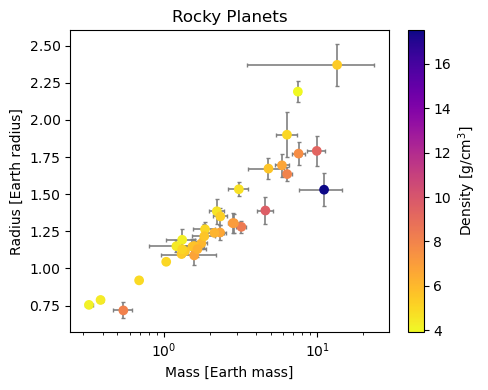

35


In [136]:
## Select rocky worlds

earth_rho = 5.5 #g/cm3
rocky = ((data['rho_gcm-3']/earth_rho)>.7) ## From paper - I'm loosely going based on Fig 3a

rocky_data = data[rocky][ind]

## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(5,4))
plt.errorbar(rocky_data.M, rocky_data.R, xerr=rocky_data.err_M, yerr=rocky_data.err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(rocky_data.M, rocky_data.R, c=rocky_data.c, zorder=100, cmap='plasma_r')
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.title('Rocky Planets')
plt.tight_layout()
plt.show()
print(len(rocky_data))

In [137]:
import pymc as pm

rocky_model = pm.Model()

with rocky_model:
    # Priors for unknown model parameters
    a = pm.Uniform("a", lower=0, upper=10) 
    b = pm.Uniform("b", lower=0, upper=10)
    mass = pm.Normal("mass", mu=np.mean(rocky_data.M) ,sigma=np.std(rocky_data.M))

    # Expected value of outcome
    r_model = a*mass**b

    # Likelihood (sampling distribution) of observations
    r_obs = pm.Normal("r_obs", mu=r_model, sigma=rocky_data.err_R, observed=rocky_data.R)

In [138]:
with rocky_model:
    # draw 1000 posterior samples
    idata = pm.sample()

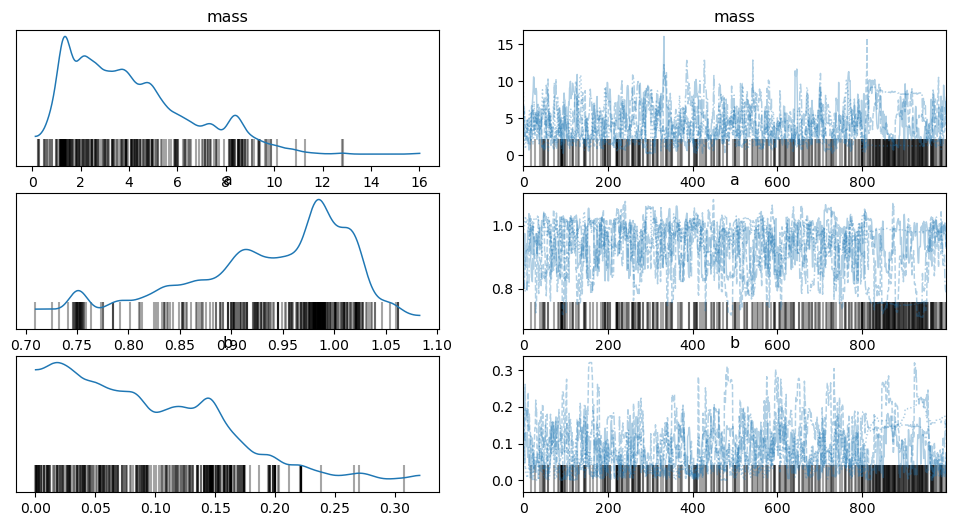

In [139]:
## visualize posterior
import arviz as az

az.plot_trace(idata, combined=True);

In [140]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mass  4.03  2.48    0.54     8.73       0.22     0.16    136.98    533.32   
a     0.93  0.08    0.75     1.03       0.02     0.01     40.17     39.20   
b     0.09  0.06    0.00     0.20       0.01     0.01     67.06    136.63   

      r_hat  
mass   1.05  
a      1.08  
b      1.06

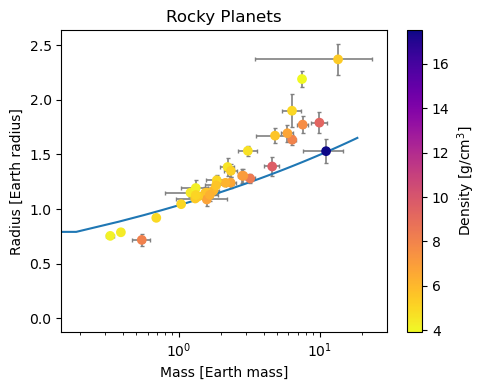

In [141]:
## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(5,4))
plt.errorbar(rocky_data.M, rocky_data.R, xerr=rocky_data.err_M, yerr=rocky_data.err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(rocky_data.M, rocky_data.R, c=rocky_data.c, zorder=100, cmap='plasma_r')
plt.plot(np.linspace(0,np.max(rocky_data.M)+5,100),0.85*np.linspace(0,np.max(rocky_data.M)+50,100)**0.16)
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.title('Rocky Planets')
plt.tight_layout()
plt.show()

### 3b - The Mass-Radius Relation for Rocky+Water Worlds (23 pts) 

Let's now add water worlds and model the mass-radius relation for both rocky and water worlds. Physically, it will require two models to describe the mass-radius relations for rocky and water worlds. The tricky part is we don't know exactly which kind of worlds a planet is belong to. In this situation, it is helpful to introduce a categorical variable `z` that is either 0 or 1, with the relative posterior probabilities telling us how Rocky/Watery a planet is.

Select the Rocky Water worlds - see the categories above 3a again. 

To make this work like magic with PyMC and it's Monte-Carlo sampler, we can choose a special prior for our categorial variable: the Drichlet Prior - https://en.wikipedia.org/wiki/Dirichlet_distribution

    # Two categories for water and rocky worlds
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(RockyWaterWorlds))
    

The rest of the PyMC model should be the same as 3a except you are fitting two relations - one for rocky worlds and one for water worlds, so you need two different `a` and `b` parameters - `shape=2` as above should take it. You might want to sort the `a` parameter with `transform=pm.distributions.transforms.ordered` when you define the prior to sort things. 

Build a PyMC model to find parameters of interest {a, b}. Plot the traces (`pm` has a `plot_trace` function)and inferred model, along with some draws.

/tmp/ipykernel_5912/2805861030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RockyWaterWorlds = data[((data['rho_gcm-3']/earth_rho)>.3)][ind]


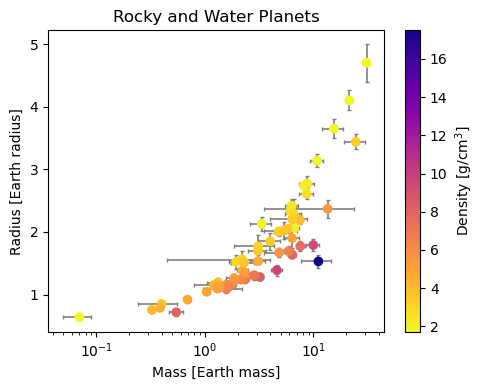

In [143]:
RockyWaterWorlds = data[((data['rho_gcm-3']/earth_rho)>.3)][ind]


## Plot the mass and radius of small planets around M-dwarfs
plt.figure(figsize=(5,4))
plt.errorbar(RockyWaterWorlds.M, RockyWaterWorlds.R, xerr=RockyWaterWorlds.err_M, yerr=RockyWaterWorlds.err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(RockyWaterWorlds.M, RockyWaterWorlds.R, c=RockyWaterWorlds.c, zorder=100, cmap='plasma_r')

plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.title('Rocky and Water Planets')
plt.tight_layout()
plt.show()

In [144]:

rocky_water_model = pm.Model()

with rocky_water_model:
    
    # Priors for unknown model parameters
    a = pm.Uniform("a", shape=2, lower=0, upper=10) 
    b = pm.Uniform("b", shape=2, lower=0, upper=3)
    p = pm.Dirichlet("p", a=np.ones(2), shape=2)
    z = pm.Categorical("z", p=p, shape=len(RockyWaterWorlds))
    mass = pm.Normal("mass", mu=np.mean(RockyWaterWorlds.M) ,sigma=np.std(RockyWaterWorlds.M))

    # Expected value of outcome
    r_model = z*(a[0]*mass**b[0])+(1-z)*(a[1]*mass**b[1])

    # Likelihood (sampling distribution) of observations
    r_obs = pm.Normal("r_obs", mu=r_model, sigma=RockyWaterWorlds.err_R, observed=RockyWaterWorlds.R)


In [145]:
with rocky_water_model:
    # draw 1000 posterior samples
    idata_rw = pm.sample()

/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


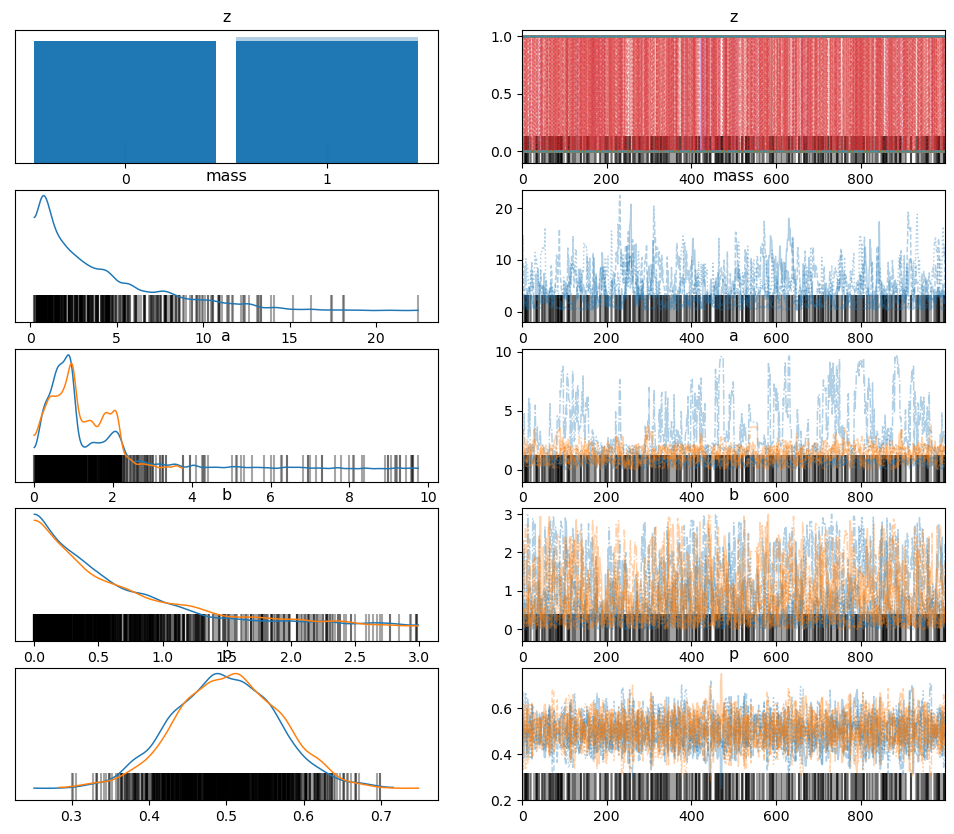

In [146]:
az.plot_trace(idata_rw, combined=True);

In [147]:
az.summary(idata_rw, round_to=2)[-6:-2]

/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/meverri/anaconda3/envs/fds/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/meverri/anaconda3/envs/fds/lib/python3

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a[0]  1.55  1.71     0.0     5.08       0.59     0.43      8.23     34.09   
a[1]  1.16  0.71     0.0     2.21       0.13     0.10     34.16    438.63   
b[0]  0.70  0.68     0.0     2.19       0.19     0.14     17.64     50.25   
b[1]  0.73  0.68     0.0     2.13       0.15     0.10     27.28    565.86   

      r_hat  
a[0]   1.43  
a[1]   1.10  
b[0]   1.16  
b[1]   1.11

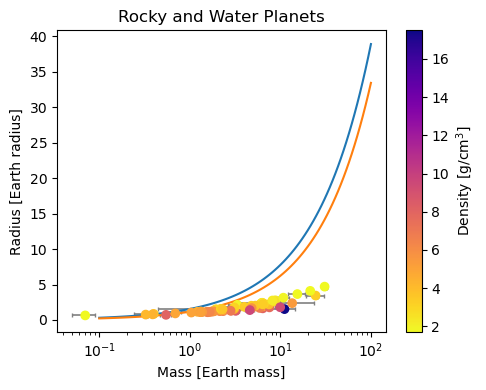

In [149]:
## Plot the mass and radius of small planets around M-dwarfs

x = np.logspace(-1,2,100)

plt.figure(figsize=(5,4))
plt.errorbar(RockyWaterWorlds.M, RockyWaterWorlds.R, xerr=RockyWaterWorlds.err_M, yerr=RockyWaterWorlds.err_R,
             linestyle='', fmt='o', markersize=4, elinewidth=1.2, capsize=1.2, c='grey')
plt.scatter(RockyWaterWorlds.M, RockyWaterWorlds.R, c=RockyWaterWorlds.c, zorder=100, cmap='plasma_r')
plt.plot(x,1.55*x**.7)
plt.plot(x,1.16*x**.73)
plt.xscale('log')
plt.xlabel('Mass [Earth mass]')
plt.ylabel('Radius [Earth radius]')
plt.colorbar(label=r'Density [g/cm$^3$]')
plt.title('Rocky and Water Planets')
plt.tight_layout()
plt.show()

### Throughout, make sure your plots have things like appropriate axes scales, axes labels, errorsbars, legends, reasonable colors. Remember, these are how you tell the story of what you've done, and ultimately what we're looking at.  


### Get started. You know how to do all of this. If not, there's something in a class notebook that can help. I'm on Teams, so direct questions there. 

# Best of luck. You've got this. 